In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
os.chdir('C:\\Users\\Dell Notebook\\Desktop\\internship\\')

In [3]:
#selecting opening stock prices
dataset_train = pd.read_csv('Google_Stock_Price_Train.csv')
training_set = dataset_train.iloc[:, 1:2].values
dataset_train.head()


,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
#scaling the values of open in the range of 0 to 1
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)
training_set_scaled

array([[0.08581368],
       [0.09701243],
       [0.09433366],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [5]:
X_train = [] #60 prev stock prices before the financial day
y_train = []


In [6]:
for i in range(60, 1258): # upper bound is last row, lower bound is i-60
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
print(X_train)
print("#********************")
print(y_train)

[[0.08581368 0.09701243 0.09433366 ... 0.07846566 0.08034452 0.08497656]
 [0.09701243 0.09433366 0.09156187 ... 0.08034452 0.08497656 0.08627874]
 [0.09433366 0.09156187 0.07984225 ... 0.08497656 0.08627874 0.08471612]
 ...
 [0.92106928 0.92438053 0.93048218 ... 0.95475854 0.95204256 0.95163331]
 [0.92438053 0.93048218 0.9299055  ... 0.95204256 0.95163331 0.95725128]
 [0.93048218 0.9299055  0.93113327 ... 0.95163331 0.95725128 0.93796041]]
#********************
[0.08627874 0.08471612 0.07454052 ... 0.95725128 0.93796041 0.93688146]


In [7]:
print(X_train.shape[0])

print(X_train.shape[1])
print(len(y_train))
# Reshaping to give as input for LSTM
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
print(X_train[0])
print('*************')
print(X_train[1])

1198
60
1198
[[0.08581368]
 [0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]
 [0.0643277 ]
 [0.0585423 ]
 [0.06568569]
 [0.06109085]
 [0.06639259]
 [0.0614257 ]
 [0.07474514]
 [0.02797827]
 [0.02379269]
 [0.02409033]
 [0.0159238 ]
 [0.01078949]
 [0.00967334]
 [0.01642607]
 [0.02100231]
 [0.02280676]
 [0.02273235]
 [0.02810849]
 [0.03212665]
 [0.0433812 ]
 [0.04475779]
 [0.04790163]
 [0.0440695 ]
 [0.04648783]
 [0.04745517]
 [0.04873875]
 [0.03936305]
 [0.04137213]
 [0.04034898]
 [0.04784582]
 [0.04325099]
 [0.04356723]
 [0.04286033]
 [0.04602277]
 [0.05398467]
 [0.05738894]
 [0.05714711]
 [0.05569611]
 [0.04421832]
 [0.04514845]
 [0.04605997]
 [0.04412531]
 [0.03675869]
 [0.04486941]
 [0.05065481]
 [0.05214302]
 [0.05612397]
 [0.05818885]
 [0.06540665]
 [0.06882953]
 [0.07243843]
 [0.07993526]
 [0.07846566]
 [0.08034452]
 [0.08497656]]
*************
[[0.09701243]
 [0.09433366]
 [0.09156187]
 [0.07984225]
 [0.0643277 ]
 [0.0585423 ]
 [0.06568569]
 [0.06109085]
 [0.06639259]
 [0.06

In [8]:
#imports for LSTM
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

Using TensorFlow backend.


In [9]:
regressor = Sequential()

In [10]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))


In [11]:
regressor.add(Dropout(0.2))


In [12]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [13]:
regressor.add(Dense(units = 1))

In [14]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [15]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)


Epoch 1/10
1198/1198 [==============================] - 3s 2ms/step - loss: 0.0436A: 1s -  - ETA: 0s - loss: 0.0
Epoch 2/10
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0049
Epoch 3/10
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0040
Epoch 4/10
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0038
Epoch 5/10
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0035
Epoch 6/10
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0039
Epoch 7/10
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0034
Epoch 8/10
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0034
Epoch 9/10
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0031
Epoch 10/10
1198/1198 [==============================] - 2s 2ms/step - loss: 0.0034


In [16]:
regressor = Sequential()

In [17]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
regressor.add(Dropout(0.2))

In [18]:
regressor.add(LSTM(units = 50, return_sequences = True))
regressor.add(Dropout(0.2))

In [19]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [20]:
regressor.add(Dense(units = 1))


In [21]:
regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')


In [22]:
regressor.fit(X_train, y_train, epochs = 10, batch_size = 32)


Epoch 1/10
1198/1198 [==============================] - 4s 3ms/step - loss: 0.0389
Epoch 2/10
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0067
Epoch 3/10
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0050
Epoch 4/10
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0048
Epoch 5/10
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0044
Epoch 6/10
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0045
Epoch 7/10
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0040
Epoch 8/10
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0040
Epoch 9/10
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0041
Epoch 10/10
1198/1198 [==============================] - 3s 3ms/step - loss: 0.0042


In [23]:
dataset_test = pd.read_csv('Google_Stock_Price_Test.csv')
real_stock_price = dataset_test.iloc[:, 1:2].values

In [24]:
dataset_total = pd.concat((dataset_train['Open'], dataset_test['Open']), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 80):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

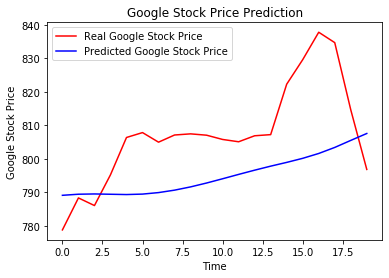

In [25]:
plt.plot(real_stock_price, color = 'red', label = 'Real Google Stock Price')
plt.plot(predicted_stock_price, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()